In [461]:
# Importing libraries 
import numpy as np
import pandas as pd
import math
import sklearn.metrics
from sklearn.metrics import pairwise_distances
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV

# Question 1

In [462]:
!pip install yfinance
import yfinance as yf
data = yf.download("AMGN HON CRM DOW WBA AAPL NKE GS V UNH CSCO TRV CVX VZ HD MSFT INTC JNJ WMT DIS CAT JPM BA KO MCD AXP IBM MRK MMM PG", start="2021-01-01", end="2022-01-01")

[*********************100%***********************]  30 of 30 completed


In [463]:
data['Adj Close'] 

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,127.874939,213.126602,115.185822,202.720001,174.324921,220.309998,41.743755,77.692520,177.679993,49.205650,...,72.701698,213.876373,137.576248,131.181946,130.513840,340.295959,214.805664,53.376492,38.113693,142.539413
2021-01-05,129.455948,214.160904,115.800575,211.630005,175.750931,221.520004,41.762749,79.792809,178.440002,50.808205,...,72.827415,214.082703,138.685898,132.019547,129.436279,335.719757,211.599731,53.131615,37.892742,141.780640
2021-01-06,125.098267,219.323120,120.084435,211.029999,185.531891,216.149994,42.161579,82.360855,179.119995,53.202927,...,73.976845,208.531662,139.785736,133.409241,133.833252,349.808685,209.735397,53.775578,39.614300,142.665863
2021-01-07,129.367020,220.047134,119.134567,212.710007,185.885986,217.979996,42.693344,82.746056,178.580002,53.275772,...,75.449554,214.465851,142.338898,132.162323,133.804382,355.416962,210.909225,53.654568,41.667286,142.656128
2021-01-08,130.483627,224.250259,119.252060,209.899994,185.914688,222.039993,42.788303,83.534813,178.690002,53.002602,...,74.560532,215.772552,143.713699,132.105209,134.362381,353.820190,212.527008,52.985374,41.621254,142.636673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.289444,218.275620,162.285141,203.169998,201.640137,258.299988,61.489910,114.659744,152.800003,53.168575,...,74.676788,339.270996,165.798645,158.046448,153.528992,493.183960,215.996109,49.945957,48.486717,139.104004
2021-12-28,178.255432,218.857269,162.304886,206.130005,201.874634,255.449997,61.596565,114.437744,155.199997,53.891823,...,74.910858,338.082153,164.650986,158.895355,154.591614,496.580444,216.412964,49.983883,49.155762,141.100235
2021-12-29,178.344925,220.631226,161.732315,203.660004,202.568314,254.539993,62.013477,113.848953,154.869995,54.301037,...,75.047386,338.775635,166.985901,160.212646,154.965515,499.187042,216.532043,49.642567,49.939503,141.031082


In [464]:
data['Adj Close'] = data['Adj Close'].pct_change()
data['Adj Close'] 

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.004853,0.005337,0.043952,0.008180,0.005492,0.000455,0.027033,0.004277,0.032569,...,0.001729,0.000965,0.008066,0.006385,-0.008256,-0.013448,-0.014925,-0.004588,-0.005797,-0.005323
2021-01-06,-0.033661,0.024104,0.036993,-0.002835,0.055652,-0.024242,0.009550,0.032184,0.003811,0.047133,...,0.015783,-0.025929,0.007930,0.010526,0.033970,0.041966,-0.008811,0.012120,0.045432,0.006244
2021-01-07,0.034123,0.003301,-0.007910,0.007961,0.001909,0.008466,0.012613,0.004677,-0.003015,0.001369,...,0.019908,0.028457,0.018265,-0.009347,-0.000216,0.016032,0.005597,-0.002250,0.051824,-0.000068
2021-01-08,0.008631,0.019101,0.000986,-0.013211,0.000154,0.018626,0.002224,0.009532,0.000616,-0.005127,...,-0.011783,0.006093,0.009659,-0.000432,0.004170,-0.004493,0.007671,-0.012472,-0.001105,-0.000136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022975,0.006166,0.001218,-0.005142,0.000873,0.020384,0.018304,0.020445,-0.005403,0.013239,...,0.011092,0.023186,0.011529,0.011680,0.008988,0.008317,0.004663,0.000000,0.004953,0.009105
2021-12-28,-0.005767,0.002665,0.000122,0.014569,0.001163,-0.011034,0.001735,-0.001936,0.015707,0.013603,...,0.003134,-0.003504,-0.006922,0.005371,0.006921,0.006887,0.001930,0.000759,0.013799,0.014351
2021-12-29,0.000502,0.008106,-0.003528,-0.011983,0.003436,-0.003562,0.006768,-0.005145,-0.002126,0.007593,...,0.001823,0.002051,0.014181,0.008290,0.002419,0.005249,0.000550,-0.006829,0.015944,-0.000490


In [465]:
corr_mat = data['Adj Close'].corr()
corr_mat

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.252390,0.105706,0.223581,0.054491,0.389548,0.373998,0.089271,0.127567,0.136439,...,0.008654,0.679083,0.257748,0.109686,0.147921,0.188535,0.303720,-0.113115,0.108143,0.263576
AMGN,0.252390,1.000000,0.123893,0.103702,0.235513,0.059567,0.366451,0.178911,0.154349,0.217755,...,0.325433,0.260747,0.144881,0.376771,0.276298,0.345912,0.167679,0.318102,0.266281,0.245633
AXP,0.105706,0.123893,1.000000,0.526504,0.581927,0.217572,0.270258,0.591817,0.522299,0.548294,...,0.033589,0.120094,0.227144,0.112694,0.572956,0.297625,0.504562,0.215401,0.194599,0.101883
BA,0.223581,0.103702,0.526504,1.000000,0.487188,0.239144,0.195604,0.494365,0.440014,0.471220,...,-0.028556,0.181608,0.189605,-0.012244,0.368907,0.077653,0.318465,0.088449,0.296689,0.185225
CAT,0.054491,0.235513,0.581927,0.487188,1.000000,0.075778,0.265909,0.591077,0.435307,0.677111,...,0.193247,0.003077,0.130650,0.123308,0.519389,0.276988,0.282905,0.266923,0.322034,0.230742
CRM,0.389548,0.059567,0.217572,0.239144,0.075778,1.000000,0.273749,0.110560,0.203393,0.115377,...,-0.003952,0.521853,0.231072,0.056684,0.037507,0.057036,0.326904,-0.002912,0.043288,0.181543
CSCO,0.373998,0.366451,0.270258,0.195604,0.265909,0.273749,1.000000,0.294727,0.317620,0.331573,...,0.155729,0.433068,0.267489,0.387357,0.383347,0.326665,0.357111,0.275468,0.285703,0.264131
CVX,0.089271,0.178911,0.591817,0.494365,0.591077,0.110560,0.294727,1.000000,0.348401,0.672391,...,0.168017,0.080990,0.172854,0.133383,0.488462,0.237786,0.309632,0.312077,0.265353,0.173751
DIS,0.127567,0.154349,0.522299,0.440014,0.435307,0.203393,0.317620,0.348401,1.000000,0.392452,...,0.051896,0.180568,0.240211,0.158798,0.394403,0.210407,0.499144,0.229330,0.181588,0.124113
DOW,0.136439,0.217755,0.548294,0.471220,0.677111,0.115377,0.331573,0.672391,0.392452,1.000000,...,0.098654,0.034020,0.209004,0.116154,0.503712,0.207661,0.294206,0.305738,0.347112,0.252352


<AxesSubplot:>

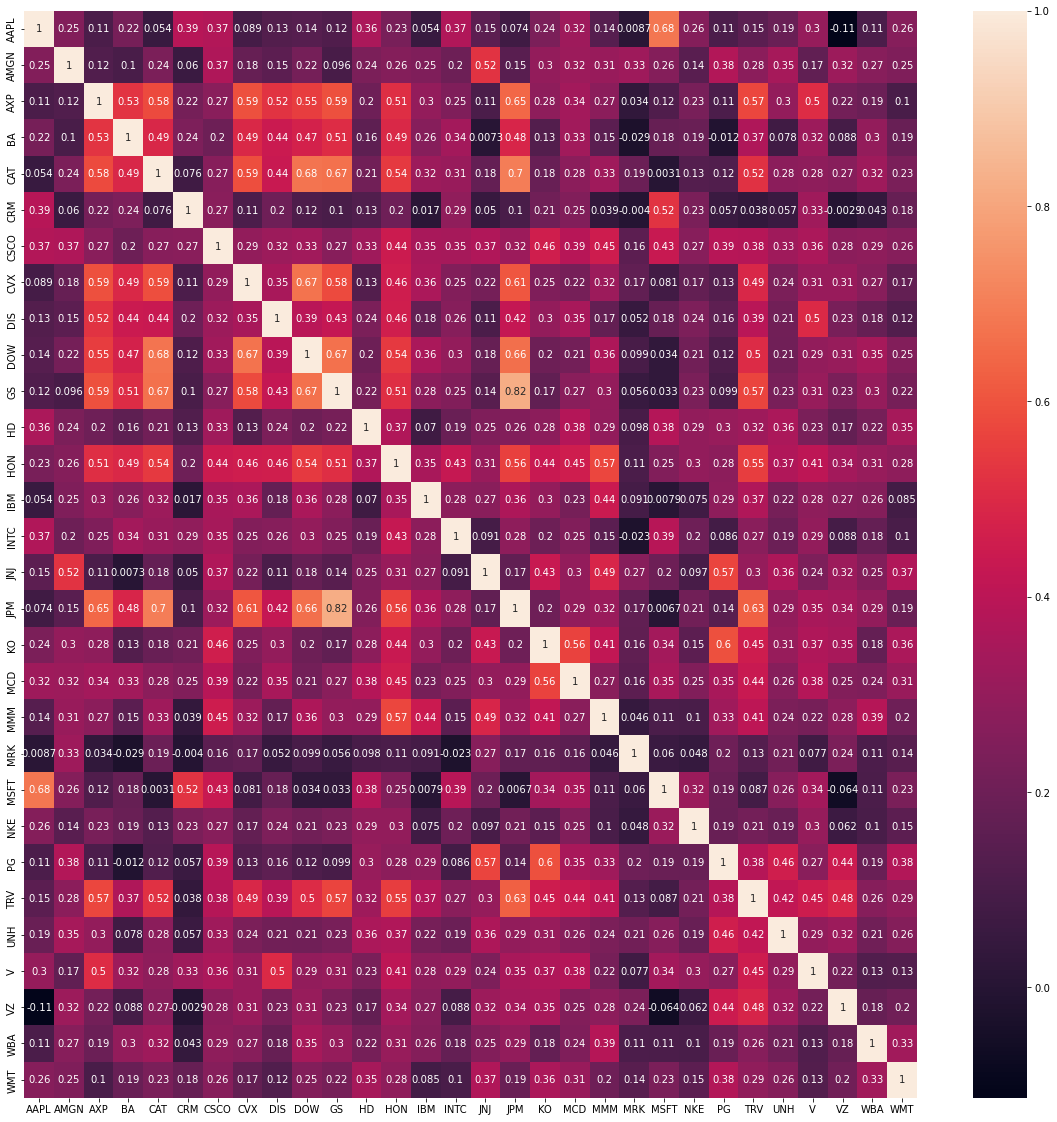

In [563]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(corr_mat, annot=True) #plotting the heatmap of the correlation amtrix
dataplot

In [466]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(corr_mat)
principalDf = pd.DataFrame(data =principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf['stocknames'] = ["AMGN"," HON","CRM", "DOW"," WBA"," AAPL"," NKE"," GS"," V ","UNH ","CSCO ","TRV"," CVX"," VZ"," HD ","MSFT"," INTC ","JNJ"," WMT ","DIS ","CAT ","JPM ","BA"," KO ","MCD"," AXP ","IBM"," MRK"," MMM"," PG"]
principalDf

,principal component 1,principal component 2,stocknames
0,-0.909286,0.787330,AMGN
1,-0.611013,-0.457396,HON
2,0.888350,0.275439,CRM
3,0.616193,0.617674,DOW
4,0.978792,-0.024247,WBA
5,-0.734835,0.912960,AAPL
6,-0.254456,-0.062344,NKE
7,0.853009,0.002466,GS
8,0.397618,0.341980,V
9,0.955425,0.029752,UNH


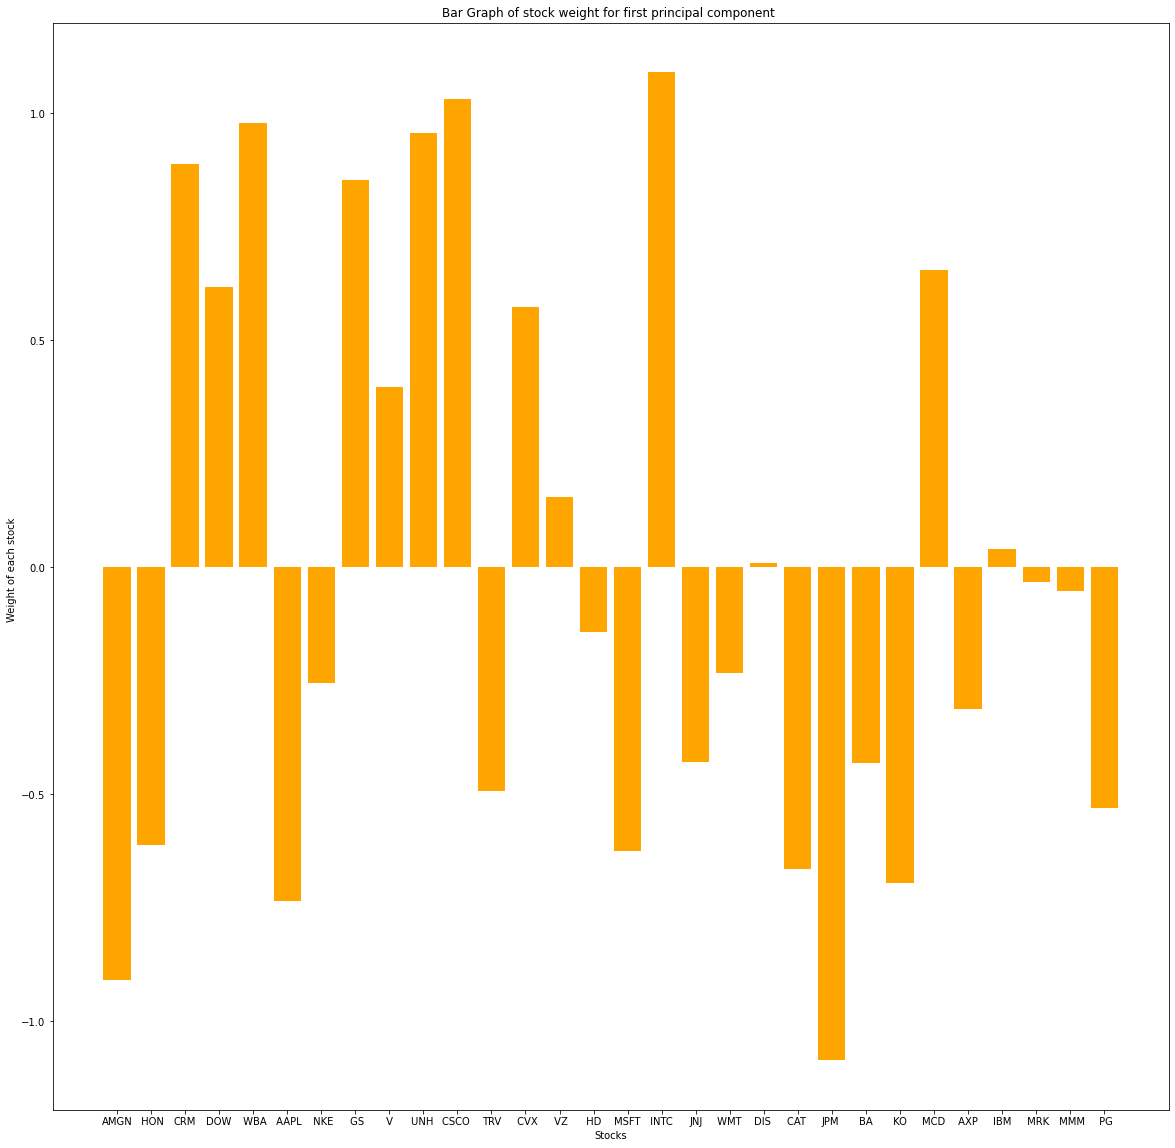

In [467]:
plt.figure(figsize=(20,20))
# principalDf['principal component 1'].plot(kind='bar',color='orange')
plt.bar(principalDf['stocknames'],principalDf['principal component 1'],color='orange')
plt.xlabel('Stocks')
plt.ylabel('Weight of each stock  ')
plt.title('Bar Graph of stock weight for first principal component ');
plt.show()

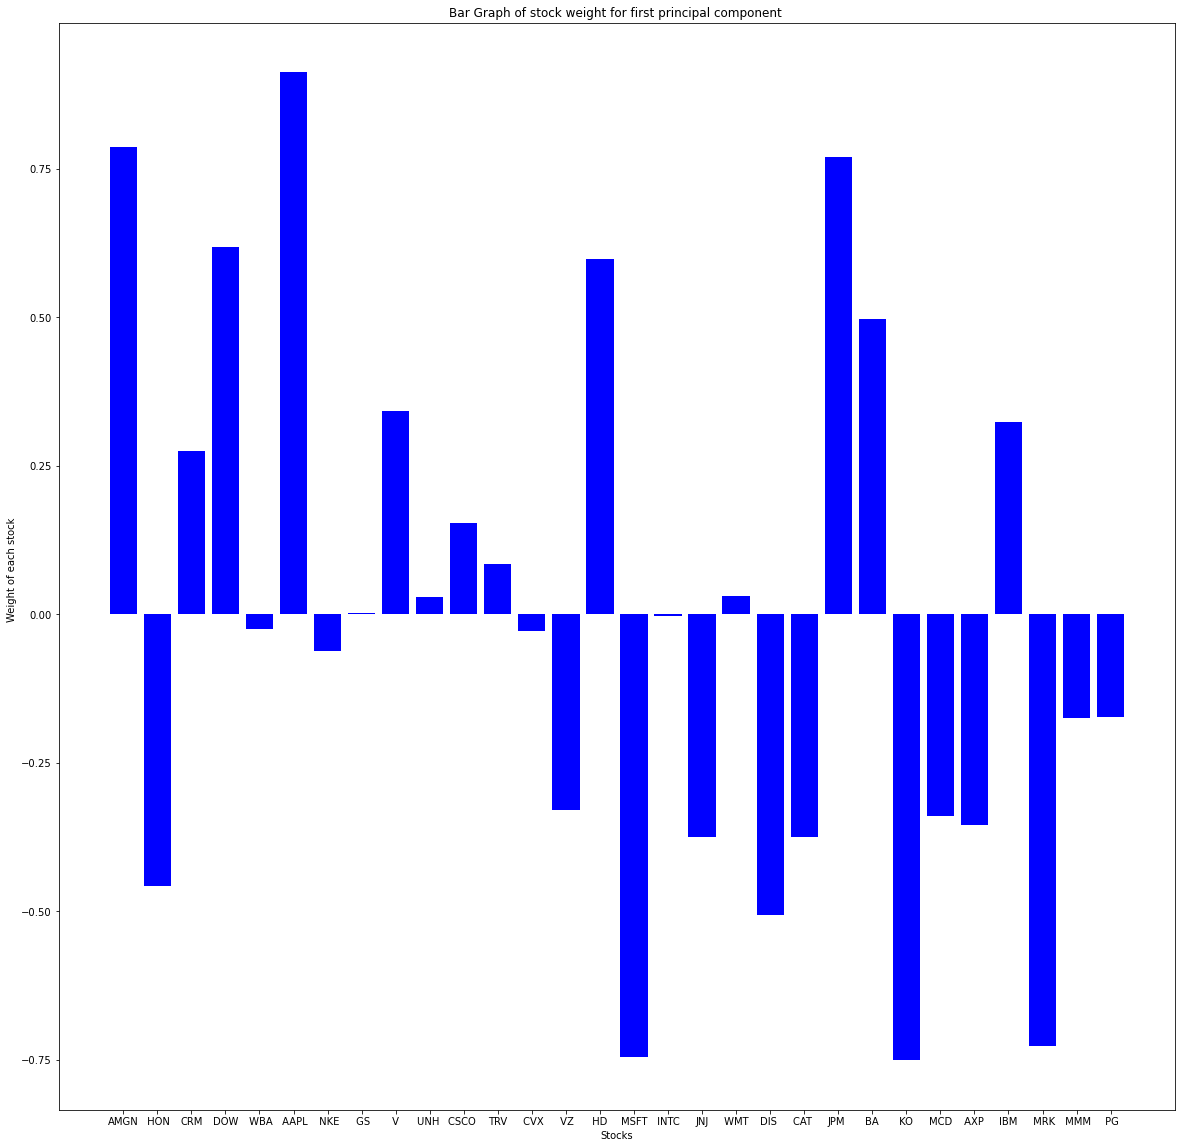

In [468]:
plt.figure(figsize=(20,20))
# principalDf['principal component 1'].plot(kind='bar',color='orange')
plt.bar(principalDf['stocknames'],principalDf['principal component 2'],color='blue')
plt.xlabel('Stocks')
plt.ylabel('Weight of each stock  ')
plt.title('Bar Graph of stock weight for first principal component ');
plt.show()

In [469]:
# principalDf['principal component 2'].plot(kind='bar')

# plt.show()

In [470]:
# plt.figure(figsize=(20,20))
# pca = PCA().fit(corr_mat)
# principalComponents = pca.components_[0:2]
# principalDf = pd.DataFrame(data =principalComponents)#columns = ['principal component 1', 'principal component 2'])
# principalDf['stocknames'] = ["AMGN"," HON","CRM", "DOW"," WBA"," AAPL"," NKE"," GS"," V ","UNH ","CSCO ","TRV"," CVX"," VZ"," HD ","MSFT"," INTC ","JNJ"," WMT ","DIS ","CAT ","JPM ","BA"," KO ","MCD"," AXP ","IBM"," MRK"," MMM"," PG"]
# principalDf

[0.38846939 0.19443221]


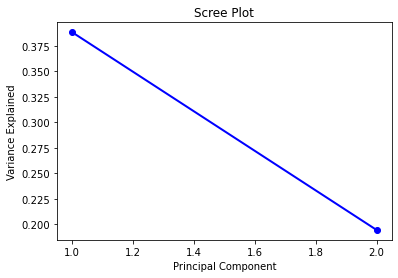

In [471]:
#scree plot of this approach
# explained_variance = principalDf['principal component 2'].explained_variance_ratio
print(pca.explained_variance_ratio_)
# pca.n_components_
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [566]:
plt.figure(figsize=(20,20))
pca = PCA().fit(corr_mat)
pca.transform(corr_mat)
df = pd.DataFrame(pca.components_[0:2])
df=df.T
print(df)


           0         1
0  -0.168965  0.286218
1  -0.103579 -0.206327
2   0.306230  0.094199
3   0.250294  0.223240
4   0.328495 -0.024619
5  -0.099054  0.328307
6  -0.037340 -0.032707
7   0.296518 -0.015299
8   0.181199  0.115121
9   0.318917 -0.001564
10  0.349071  0.044025
11 -0.067269  0.010508
12  0.178035 -0.011138
13  0.128493 -0.161855
14  0.041181  0.212731
15 -0.108670 -0.322039
16  0.352034 -0.012677
17 -0.072162 -0.165530
18 -0.020374 -0.000498
19  0.071062 -0.226825
20 -0.059911 -0.198372
21 -0.228379  0.283511
22 -0.024976  0.165841
23 -0.127754 -0.325095
24  0.214968 -0.142493
25 -0.021775 -0.164455
26  0.065237  0.114701
27  0.080088 -0.323953
28  0.070519 -0.099379
29 -0.070802 -0.096207


<Figure size 1440x1440 with 0 Axes>

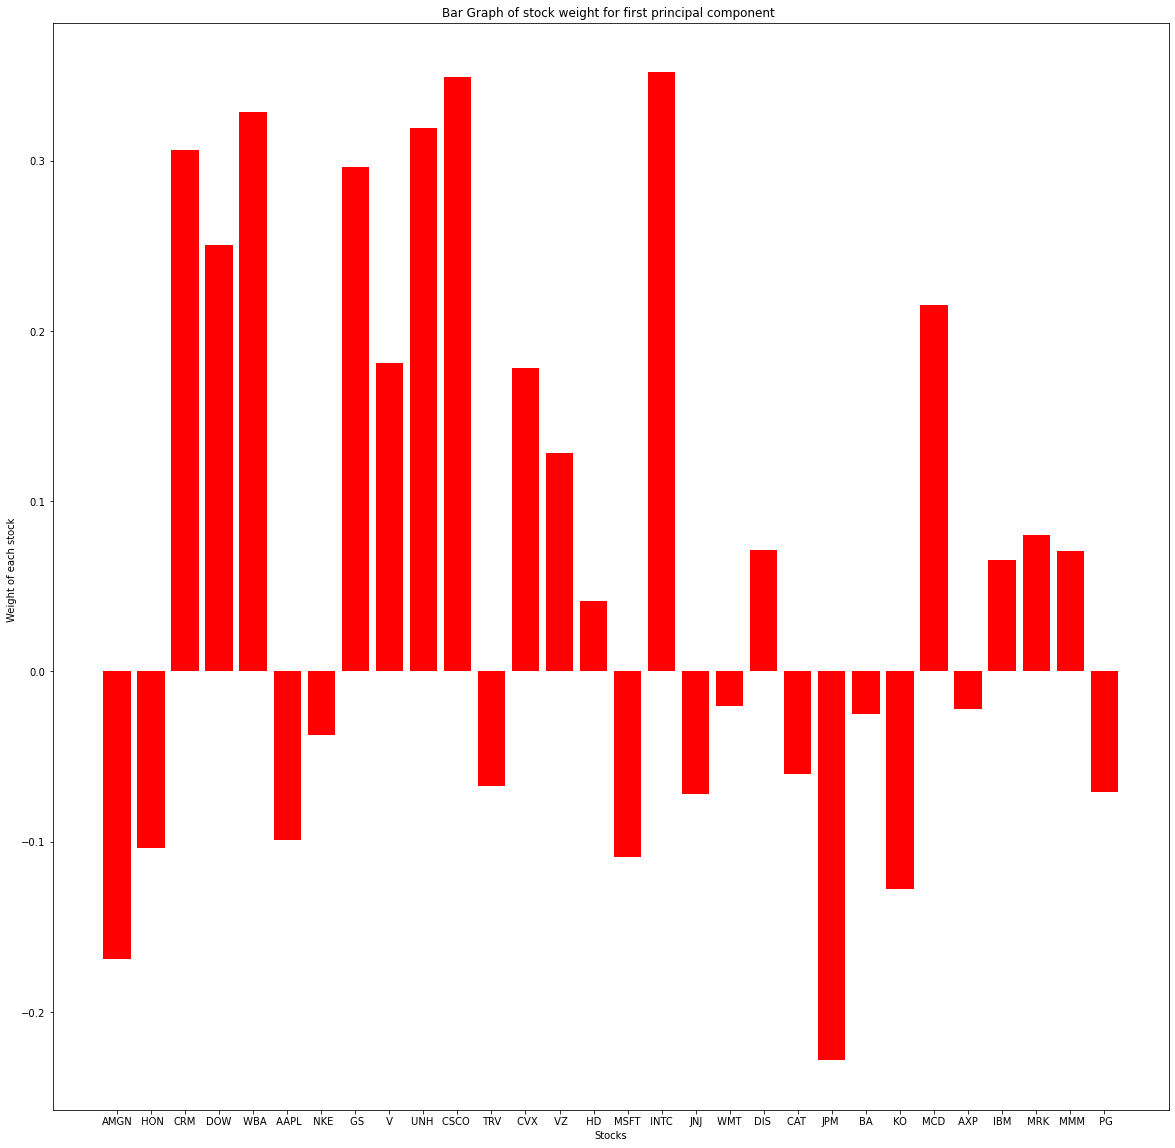

In [567]:
plt.figure(figsize=(20,20))
df['stock'] = ["AMGN"," HON","CRM", "DOW"," WBA"," AAPL"," NKE"," GS"," V ","UNH ","CSCO ","TRV"," CVX"," VZ"," HD ","MSFT"," INTC ","JNJ"," WMT ","DIS ","CAT ","JPM ","BA"," KO ","MCD"," AXP ","IBM"," MRK"," MMM"," PG"]
plt.bar(df['stock'],df[0],color='red')
plt.xlabel('Stocks')
plt.ylabel('Weight of each stock  ')
plt.title('Bar Graph of stock weight for first principal component ');

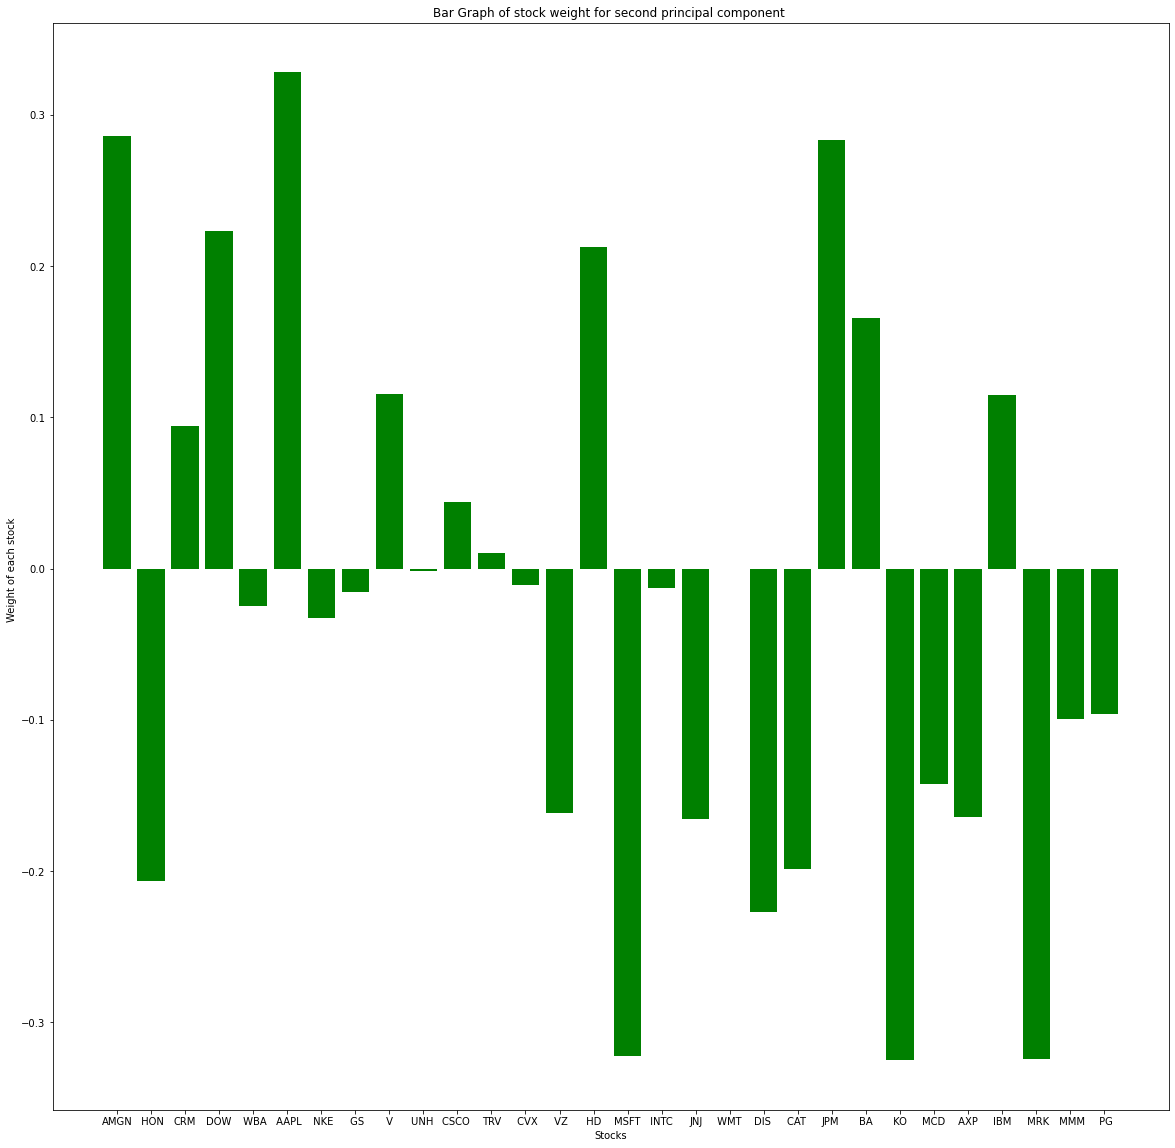

In [568]:
plt.figure(figsize=(20,20))
plt.bar(df['stock'],df[1],color='green')
plt.xlabel('Stocks')
plt.ylabel('Weight of each stock  ')
plt.title('Bar Graph of stock weight for second principal component ');

<Figure size 1440x1440 with 0 Axes>

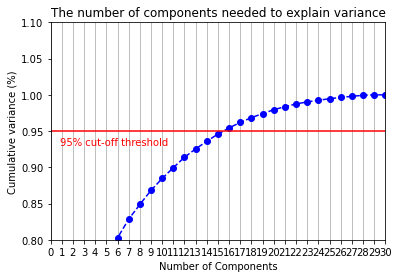

In [569]:
#finding 95% of variance
plt.figure(figsize=(20,20))
pcc = pca.explained_variance_ratio_
# reduced
fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pcc)

plt.ylim(0.8,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlim(1,4)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

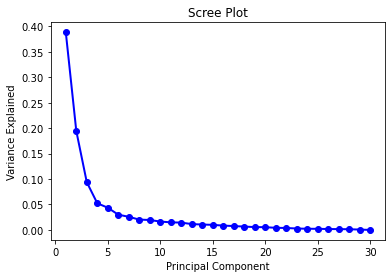

In [570]:
# print(pca.explained_variance_ratio_)
# pca.n_components_
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

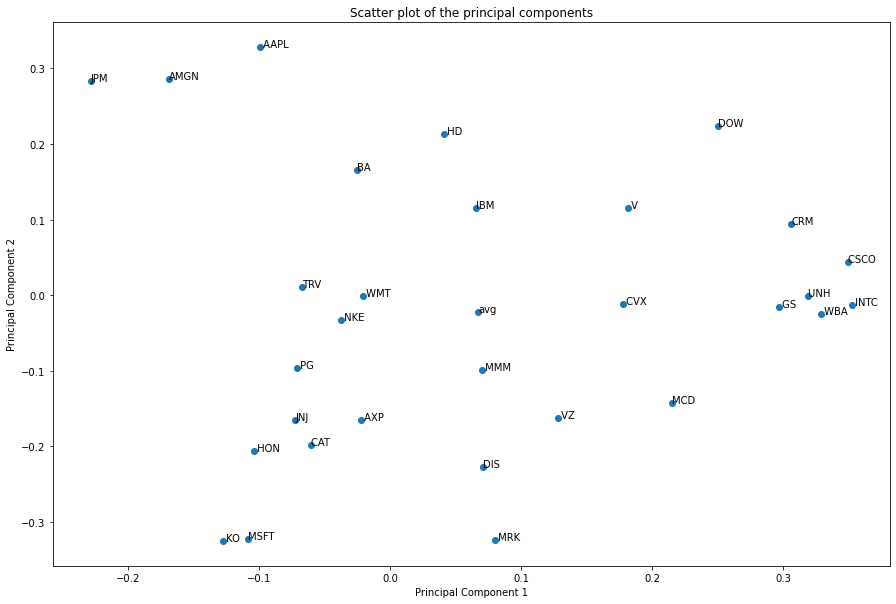

Mean of all 30 stocks: 0.06737761293958808 -0.0217542997614442


In [577]:
# scatter plot of the first 2 principal component
p1avg = df[0].mean()
p2avg = df[1].mean()
plt.figure(figsize =(15,10))
plt.scatter(df[0], df[1])
for i in range(0,len(df['stock'])):
    plt.text(df[0][i],df[1][i],df['stock'][i])
plt.text(p1avg,p2avg,s='avg')
plt.plot(p1avg,p2avg,marker='o',label="optimal point")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter plot of the principal components")
plt.show()

print("Mean of all 30 stocks:",p1avg,p2avg)

In [580]:
#average pca of all 30 stocks
p1avg = df[0].mean()
p2avg = df[1].mean()
pc1 = df[0] - p1avg
pc12 = df[1] - p1avg
pc2
#euclidean distance for pc1
euc_d = pc1**2 + pc12**2
alls = euc_d**0.5
# print(alls)
print("Euclidean distance for pc1")
print(alls.sort_values())

pc2 = df[0] - p2avg
pc22 = df[1] - p2avg

#euclidean distance for pc2

euc_dd = pc2**2 + pc22**2
allss = euc_dd**0.5
print("Euclidean distance for pc2")
# print(allss)
print(allss.sort_values())

Euclidean distance for pc1
26    0.047372
18    0.110939
8     0.123429
22    0.134997
12    0.135683
6     0.144854
11    0.146164
14    0.147696
28    0.166786
29    0.214134
13    0.237240
3     0.240316
2     0.240354
7     0.243599
25    0.248384
24    0.256571
9     0.260816
17    0.271509
4     0.276850
10    0.282659
19    0.294225
20    0.294662
16    0.295699
5     0.309490
0     0.322101
1     0.322708
21    0.366313
27    0.391537
15    0.427361
23    0.438305
dtype: float64
Euclidean distance for pc2
6     0.019049
18    0.021302
11    0.055789
29    0.089156
28    0.120581
25    0.142701
17    0.152356
26    0.161826
20    0.180693
22    0.187623
12    0.200071
1     0.201897
13    0.205433
19    0.225097
14    0.242785
8     0.244796
24    0.265735
15    0.312610
7     0.318337
27    0.318898
23    0.321328
9     0.341269
0     0.341347
2     0.347878
4     0.350261
5     0.358495
3     0.366105
21    0.368620
16    0.373899
10    0.376614
dtype: float64


In [573]:
#average of all 30 stocks
data['Adj Close'].mean()

AAPL    0.001409
AMGN    0.000171
AXP     0.001502
BA      0.000221
CAT     0.000716
CRM     0.000728
CSCO    0.001614
CVX     0.001622
DIS    -0.000425
DOW     0.000533
GS      0.001659
HD      0.001967
HON     0.000149
IBM     0.000782
INTC    0.000445
JNJ     0.000496
JPM     0.001104
KO      0.000626
MCD     0.001105
MMM     0.000324
MRK     0.000221
MSFT    0.001855
NKE     0.000873
PG      0.000823
TRV     0.000749
UNH     0.001573
V       0.000121
VZ     -0.000279
WBA     0.001219
WMT     0.000068
dtype: float64

# Question 2

<AxesSubplot:>

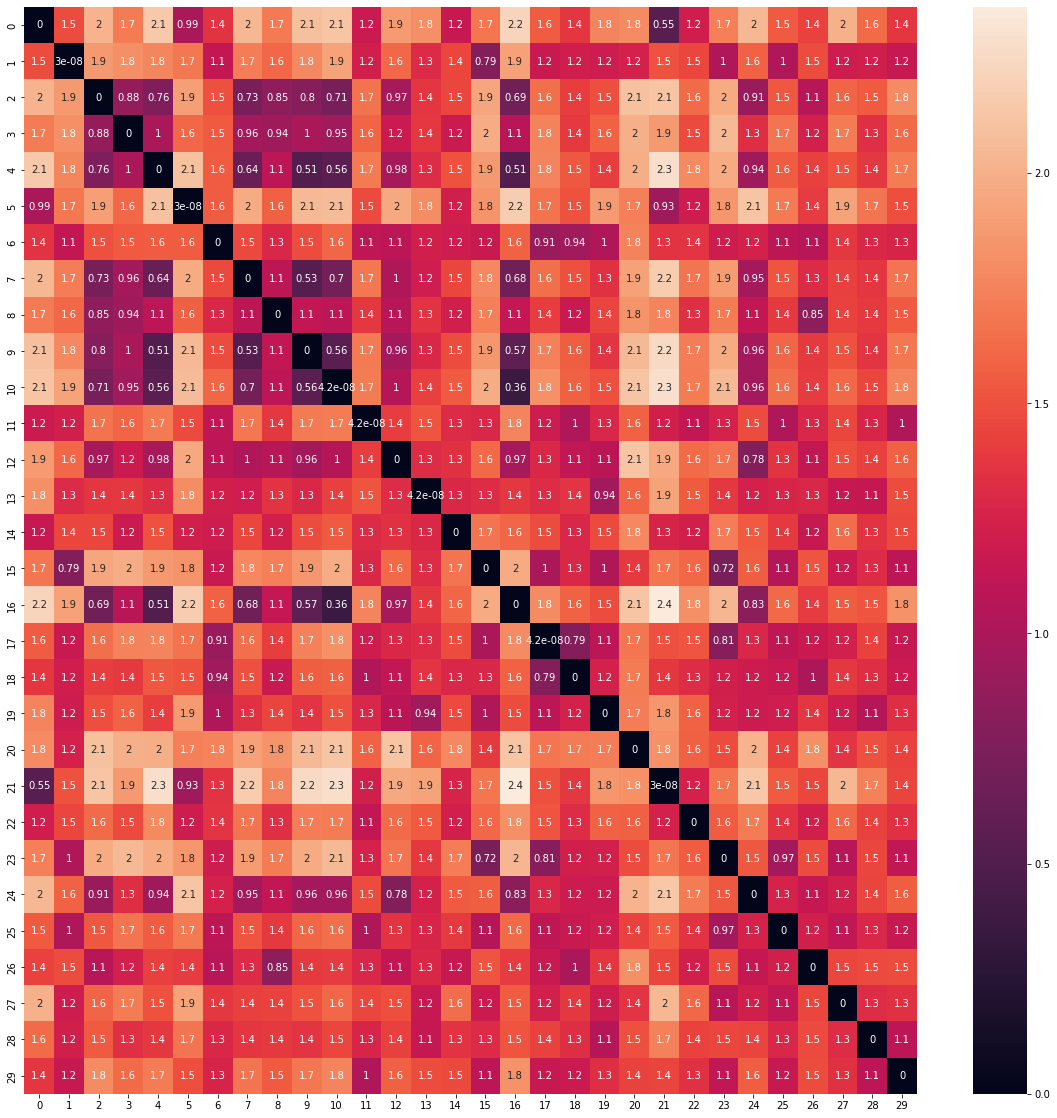

In [574]:
#pairwise distances
plt.figure(figsize=(20,20))
p_dist = pairwise_distances(corr_mat)
# p_dist
dataplot = sb.heatmap(p_dist, annot=True) #plotting the heatmap 
dataplot

Text(0.5, 1.0, 'Dendogram of the principal components')

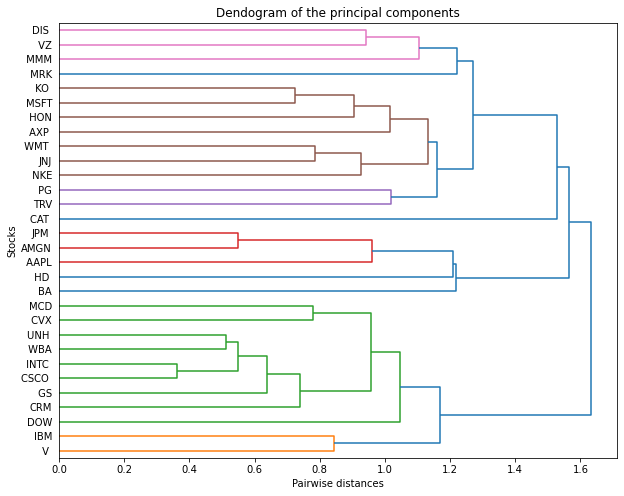

In [575]:
plt.figure(figsize=(10,8))
labelle = ["AMGN"," HON","CRM", "DOW"," WBA"," AAPL"," NKE"," GS"," V ","UNH ","CSCO ","TRV"," CVX"," VZ"," HD ","MSFT"," INTC ","JNJ"," WMT ","DIS ","CAT ","JPM ","BA"," KO ","MCD"," AXP ","IBM"," MRK"," MMM"," PG"]
dendrogram = sch.dendrogram(sch.linkage(corr_mat, method='average'), orientation = 'right',labels=labelle)
plt.xlabel("Pairwise distances")
plt.ylabel("Stocks")
plt.title("Dendogram of the principal components")

[2 0 1 1 1 2 0 1 1 1 1 0 1 0 2 0 1 0 0 0 0 2 2 0 1 0 1 0 0 0]


C:\Users\Farida Eleshin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster of the principal components')

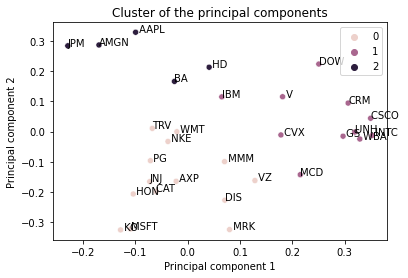

In [576]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(corr_mat) 
print(labels)
for i in range(0,len(labelle)):
    plt.text(df[0][i],df[1][i],labelle[i])
sb.scatterplot(df[0],df[1],hue=labels)

# plt.show()
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Cluster of the principal components")

# Question 3

In [582]:
titanicdata = pd.read_csv("titanic.csv") #reading the titanics data 
# titanicdata.isnull().sum() #checking for null values 
# filling na values with average of the column
titanicdata['age'] = titanicdata['age'].fillna(titanicdata['age'].mean())
titanicdata['body'] = titanicdata['body'].fillna(titanicdata['body'].mean())
titanicdata['fare'] = titanicdata['fare'].fillna(titanicdata['fare'].mean())
titanicdata['sex'].replace(['female', 'male'],
                        [1, 2], inplace=True)
titanicdata

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",2,0.920000,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",2,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.000000,NaN
1305,3,0,"Zabour, Miss. Thamine",1,29.881138,1,0,2665,14.4542,NaN,C,NaN,160.809917,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",2,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.000000,NaN
1307,3,0,"Zakarian, Mr. Ortin",2,27.000000,0,0,2670,7.2250,NaN,C,NaN,160.809917,NaN


In [583]:
x = titanicdata[['pclass', 'sex','age']]
y = titanicdata['survived'] 
rand_forest = RandomForestClassifier(random_state = 0)
nums = [*range(30,100,5)]
param_grid = { 
    'n_estimators': nums,
}
cv_rfc = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv= 5)
cv_rfc.fit(x, y)  
cv_rfc.best_params_

#visualize 

# fit the regressor with x and y data
# rand_forest.fit(x, y)  
# y_pred = rand_forest.predict(x)
# # Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# y_pred
# # print("Accuracy:",sklearn.metrics.accuracy_score(y, y_pred))
# fpr, tpr, thresholds = roc_curve(y, y_pred)
# plt.plot(fpr, tpr)

{'n_estimators': 80}

In [584]:
rfc1=RandomForestClassifier(random_state=0, n_estimators= 80)
rfc1.fit(x,y)

RandomForestClassifier(n_estimators=80, random_state=0)

In [585]:
scores = cv_rfc.cv_results_['mean_test_score']

Text(0.5, 1.0, 'Selection of optimal estimator')

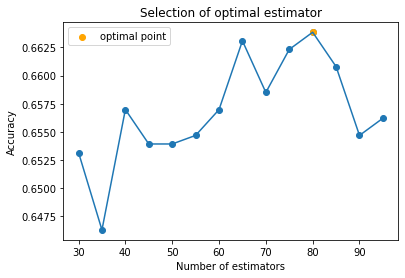

In [586]:
plt.plot(nums,scores)
plt.scatter(nums,scores)
plt.scatter(80,scores.max(),color='orange',label='optimal point')
plt.legend()
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Selection of optimal estimator")

In [588]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression(random_state=0)
modelLogistic.fit(x,y)
#Make prediction for the test data
y_pred1= modelLogistic.predict_proba(x)[::,1]
fpr1, tpr1, thresholds1 = roc_curve(y, y_pred1)
auc1 = roc_auc_score(y, y_pred1)

#print AUC score
print(auc1)
# plt.plot(fpr1, tpr1)

0.8341100123609394


In [589]:
#knn
f_knn =KNeighborsClassifier(n_neighbors=4)
model = f_knn.fit(x,y)
knn_pred = model.predict_proba(x)[::,1]
fpr2, tpr2, thresholds2 = roc_curve(y, knn_pred)
auc2 = roc_auc_score(y, knn_pred)

#print AUC score
print(auc2)

0.8746069221260817


In [591]:
#classification tree
dec_tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
dec_tree.fit(x, y)
# tree.plot_tree(dec_tree)
tree_pred = dec_tree.predict_proba(x)[::,1] #making predictions with decision tree. 
# tree_pred
fpr3, tpr3, thresholds3 = roc_curve(y, tree_pred)
auc2 = roc_auc_score(y, tree_pred)

#print AUC score
print(auc2)

0.8420951792336215


In [592]:
y_pred = rfc1.predict_proba(x)[::,1]
fpr, tpr, thresholds1 = roc_curve(y, y_pred)
auc2 = roc_auc_score(y, y_pred)

#print AUC score
print(auc2)

0.9224857849196539


Text(0.5, 1.0, 'ROC curve')

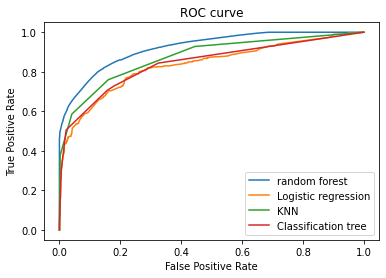

In [593]:
plt.plot(fpr,tpr,label='random forest')
plt.plot(fpr1, tpr1,label='Logistic regression')
plt.plot(fpr2, tpr2,label='KNN')
plt.plot(fpr3, tpr3,label='Classification tree')
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve")

# Question 4

In [594]:
winequality_red= pd.read_csv("winequality-red.csv")
winequality_white= pd.read_csv("winequality-white.csv") 
x_red = pd.DataFrame(winequality_red[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])  
y_red = winequality_red['quality']
x_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [595]:
rand_forestregressor = RandomForestRegressor(random_state = 0)
nums = [*range(30,100,5)]
param_grid = { 
    'n_estimators': nums,
}
cv_rfc1 = GridSearchCV(estimator=rand_forestregressor, param_grid=param_grid, scoring = 'neg_mean_squared_error',cv= 5)
cv_rfc1.fit(x_red, y_red)  
cv_rfc1.best_params_

{'n_estimators': 90}

Text(0.5, 1.0, 'Selection of optimal estimator with minimum loss')

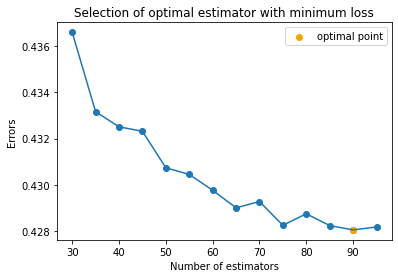

In [604]:
rfc_reg=RandomForestRegressor(random_state=0, n_estimators= 90)
rfc_reg.fit(x_red,y_red)
scores_reg = cv_rfc1.cv_results_['mean_test_score']
plt.plot(nums,abs(scores_reg))
plt.scatter(nums,abs(scores_reg))
plt.scatter(90,abs(scores_reg).min(),color='orange',label='optimal point')
plt.legend()
plt.xlabel("Number of estimators")
plt.ylabel("Errors")
plt.title("Selection of optimal estimator with minimum loss")

In [597]:
print("Accuracy of random forest regression: ",1-abs(scores_reg).min())

Accuracy of random forest regression:  0.5719537334552421


Text(0.5, 1.0, 'Selection of important features')

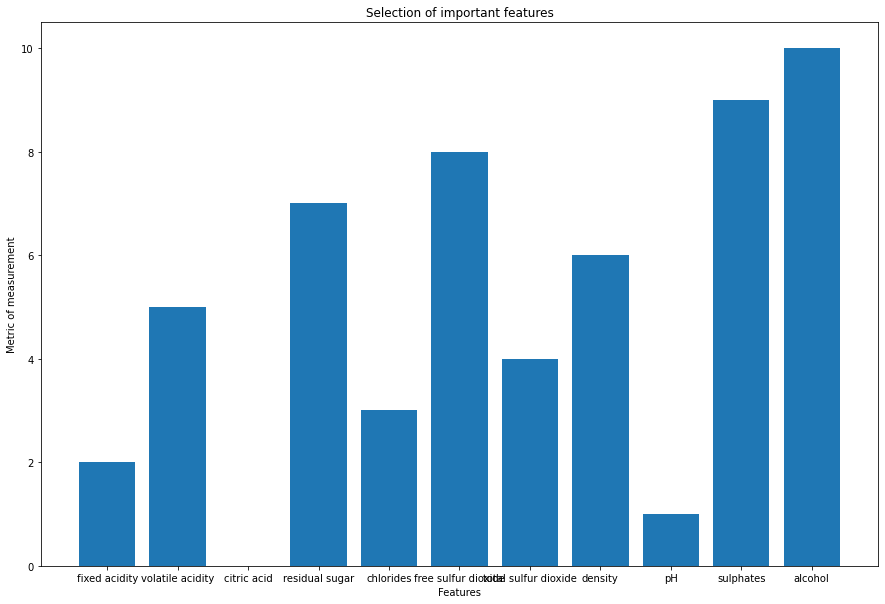

In [606]:
#feature selection
plt.figure(figsize=(15,10))
important_features = rfc_reg.feature_importances_.argsort()
important_features
# plot feature importance
plt.bar([x_red.columns[x] for x in range(len(important_features))], important_features)
plt.xlabel("Features")
plt.ylabel("Metric of measurement")
plt.title("Selection of important features")

In [599]:
data_corr = winequality_red.corr()
data_corr['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Text(0.5, 1.0, 'Selection of important features')

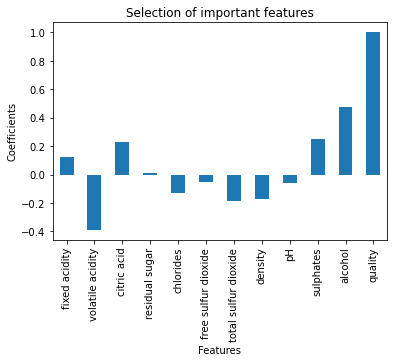

In [607]:
data_corr['quality'].plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Selection of important features")

In [601]:
model1 = LassoCV(cv=10, random_state=0)
model1.fit(x_red, y_red)
model1.alpha_
lasso_best = Lasso(alpha=model1.alpha_)
lasso_best.fit(x_red, y_red)
print(list(zip(lasso_best.coef_, x_red)))

[(0.029844768086047125, 'fixed acidity'), (-0.9849545499214847, 'volatile acidity'), (-0.0, 'citric acid'), (0.0, 'residual sugar'), (-0.0, 'chlorides'), (0.004776180433621903, 'free sulfur dioxide'), (-0.0030690745200809967, 'total sulfur dioxide'), (-0.0, 'density'), (-0.0, 'pH'), (0.5193541180755874, 'sulphates'), (0.301766794470893, 'alcohol')]


Text(0.5, 1.0, 'Selection of important features lasso')

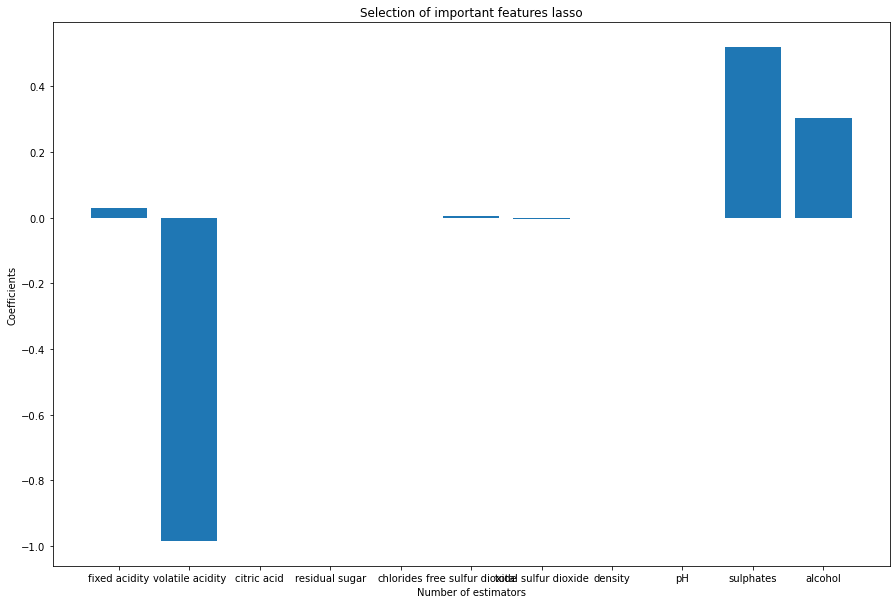

In [608]:
plt.figure(figsize=(15,10))
df = pd.DataFrame(lasso_best.coef_)
df['features'] = winequality_red.columns[0:11]
# df.plot(kind='bar')
plt.bar(df['features'],df[0])
plt.xlabel("Number of estimators")
plt.ylabel("Coefficients")
plt.title("Selection of important features lasso")

In [603]:
#from Assignment 6, 
print("MSE for KNN:  0.7366430817610062")
print("MSE for Linear model: 0.43710956574798576")

MSE for KNN:  0.7366430817610062
MSE for Linear model: 0.43710956574798576
